<a href="https://colab.research.google.com/github/beamscource/colab_notebooks/blob/main/mlops_kubernetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Candidate Handbook**: https://www.cncf.io/certification/candidate-handbook

**Exam Tips**: https://docs.linuxfoundation.org/tc-docs/certification/tips-cka-and-ckad

**Other infos**
- https://github.com/mmumshad/kubernetes-the-hard-way
- https://docs.linuxfoundation.org/tc-docs/certification/faq-cka-ckad-cks
- https://docs.linuxfoundation.org/tc-docs/certification/faq-cka-ckad-cks
- https://join.slack.com/t/kodekloud/shared_invite/zt-1n6rss375-e1YEkgAkEkKTMDp5DV4Eeg

**Certified Kubernetes Application Developer**: https://www.cncf.io/certification/ckad/

- https://www.youtube.com/user/mmumshad
- https://www.youtube.com/watch?v=rnemKrveZks

**Kubernetes Challenges**

- https://kodekloud.com/courses/kubernetes-challenges/?utm_source=udemy&utm_medium=video-description&utm_campaign=kubernetes-challenges
- https://kodekloud.com/p/kubernetes-challenges

- https://github.com/dgkanatsios/CKAD-exercises


## Core Concepts
- https://kodekloud.com/topic/practice-test-introduction-4/


# Kubernetes Architecture

## Nodes

Kubernetes is configured on one or more Nodes. A node is a machine –physical or virtual –on which kubernetes is installed. You need to have more than one nodes for high availability and scaling. 



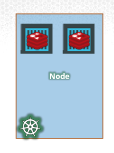

A cluster is a set of nodes grouped together. If one node fails you have your application still accessible from the other nodes. Moreover having multiple nodes helps in sharing load as well.

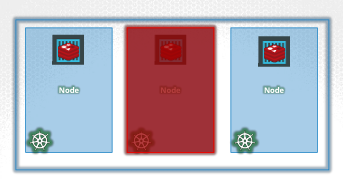

The master is another node and watches over the nodes in the cluster and is responsible for the actual orchestration of containers on the worker nodes. 

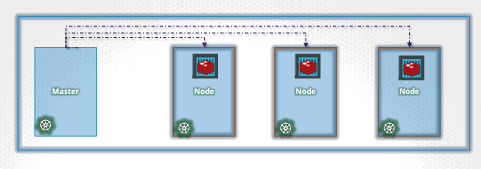

When you install Kubernetes you are installing the following components: 

- API Server
- ETCD service
- kubeletservice
- Container Runtime
- Controllers and Schedulers

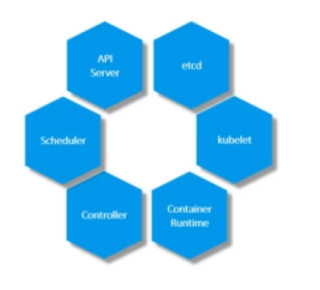

The **API server** acts as the front-end for Kubernetes. The users, management devices, Command line interfaces all talk to the API server to interact with the kubernetes cluster.

**ETCD** is a distributed reliable **key-value store** used by kubernetes to store all data used to manage the cluster. 

The **scheduler** is responsible for distributing work or containers across multiple nodes.  It looks for newly created containers and assigns them to Nodes.

The **controllers** are responsible for noticing and responding when nodes, containers or endpoints goes down. The controllers makes decisions to bring up new containers in such cases.

The **container runtime** is the underlying software that is used to run containers. In our case it happens to be Docker.

**kubelet** is the agent that runs on each node in the cluster. The agent is responsible for making sure that the containers are running on the nodes as expected.

An additional component on the Node is the kube-proxy. It takes care of networking within Kubernetes.

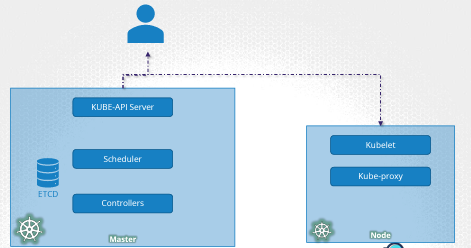

Master vs worker node

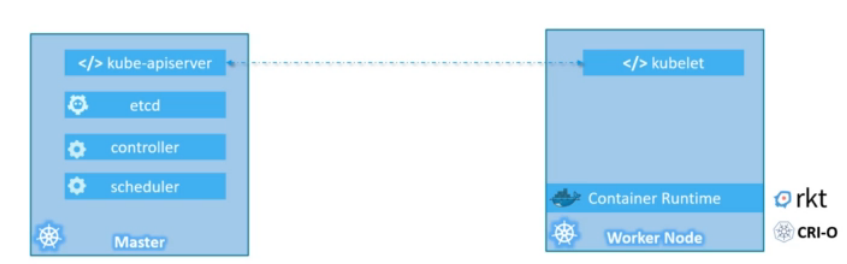

In [ ]:
kubectl run cluster
kubectl cluster-info
kubectl get nodes

### PODS

- Link to the lab: https://uklabs.kodekloud.com/topic/pods-4/


Kubernetes does not deploy containers directly on the worker nodes. The containers are encapsulated into a Kubernetes object known as PODs.

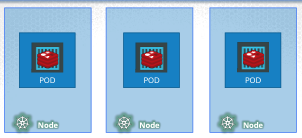

Here we see the simplest of simplest cases were you have a single node kubernetes cluster with a single instance of your application running in a single docker container encapsulated in a POD. 

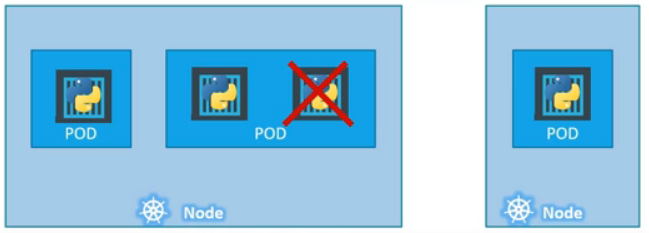

PODs usually have a one-to-one relationship with containers running your application. To scale UP you create new PODs and to scale down you delete PODs.

A single POD CAN have multiple containers, except for the fact that they are usually not multiple containers of the same kind. 

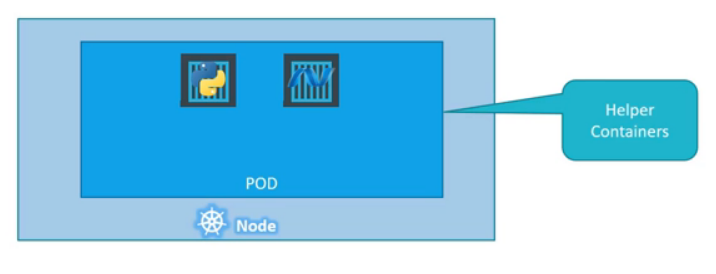

Sometimes you might have a scenario were you have a helper container, that might be doing some kind of supporting task for our web application such as processing a user entered data, processing a file uploaded by the user etc. and you want these helper containers to live along side your application container.

The two containers can also communicate with each other directly by referring to each other as ‘localhost’ since they share the same network namespace. Plus they can easily share the same storage space as well.

In [ ]:
# see all pods in the default name space
kubectl get pods
# create a pod called nginx using the docker image of the same name
kubectl run nginx --image=ngingx
# see detailed description of a pod
kubectl describe pods/xxxxx
# get a wide output with more infos (which you can also get from the description)
kubectl get pods -o wide
# delete a pod
kubectl delete pods/webapp #kubectl delete pod webapp


Kubernetes uses YAML files as input for the creation of objects such as PODs, Replicas, Deployments, Services etc.

A kubernetes definition file always contains 4 top level fields.  The apiVersion, kind, metadata and spec. 

These are all REQUIRED fields, so you MUST have them in your configuration file. 

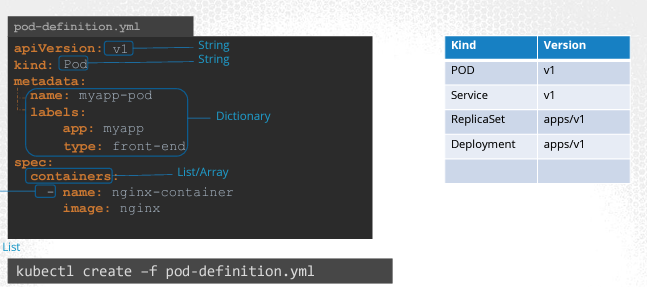

- apiVersion is the version of the kubernetes API we’re using to create the object
-  few other possible values for this field are apps/v1beta1, extensions/v1beta1 etc. 
-  kind refers to the type of object we are trying to create, which in this case happens to be a POD;  other possible values here could be ReplicaSet or Deployment or Service
- metadata is data about the object like its name, labels etc.; the name is a string value –so you can name your POD myapp-pod -and the labels is a dictionary
-  you could add other labels as you see fit which will help you identify these objects at a later point in time

Say for example there are 100s of PODs running a front-end application, and 100’s of them running a backend application or a database, it will be DIFFICULT for you to group these PODs once they are deployed.  If you label them now as front-end, back-end or database, you will be able to filter the PODs based on this label at a later point in time. 

- You CANNOT add any other property as you wish under metadata. However, under labels you CAN have any kind of key or value pairs as you see fit.

- The last section in the configuration file is the specification which is written as spec.

In [ ]:
# use dry run and pipe configuration file into a yaml
kubectl run redis --image=redis123 --dry-run=client -o yaml > redis.yaml
cat redis.yaml

In any of the practical quizzes if you are asked to edit an existing POD, please note the following:

- If you are given a pod definition file, edit that file and use it to create a new pod.
- If you are not given a pod definition file, you may extract the definition to a file using the below command:

- kubectl get pod pod-name -o yaml > pod-definition.yaml

Then edit the file to make the necessary changes, delete and re-create the pod.

Use the kubectl edit pod pod-name command to edit pod properties.


In [ ]:
apiVersion: v1
kind: Pod
metadata:
  name: redis
  labels:
    app: redis
    type: cache
spec:
  containers:
  - name: redis-container
    image: redis123

kubectl create -f redis.yaml
kubectl apply -f pod-definition-redis.yaml 

In [ ]:
https://web.archive.org/web/20210613150948/https://kodekloud.com/courses/kubernetes-certification-course/lectures/6743640

### ReplicaSets

What if for some reason our application crashes and the pod fails? Users will no longer be able to access our application.

To prevent users from losing access to our application, we would like to have more than one instance or pod running at the same time.

The replication controller helps us run multiple instances of a single pod in the Kubernetes cluster thus providing high availability.

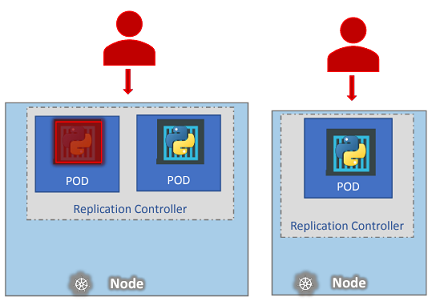

Another reason we need replication controller is to create multiple pods to share the load across them.

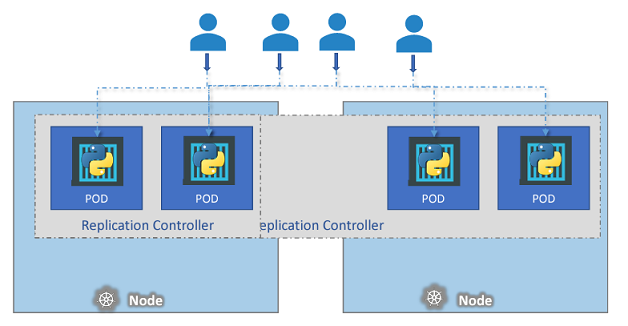

Replication controller is the older technology that is being replaced by replica set.

Replica set is the new recommended way to set up replication.

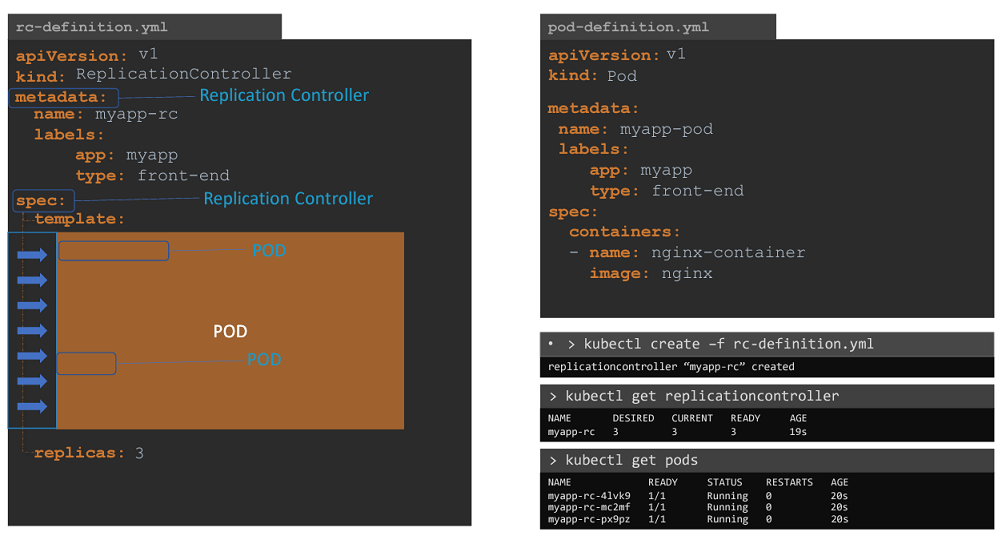

There is one major difference between replication controller and replica set.

Replica set requires a selector definition. The selector section helps the replica set identify what pods fall under it.

It's because replica set can also manage pods that were not created as part of the replica set creation.

Say for example, the were pods created before the creation of the replica set that match labels specified in the selector. 

The replica set will also take those parts
into consideration when creating the replicas.

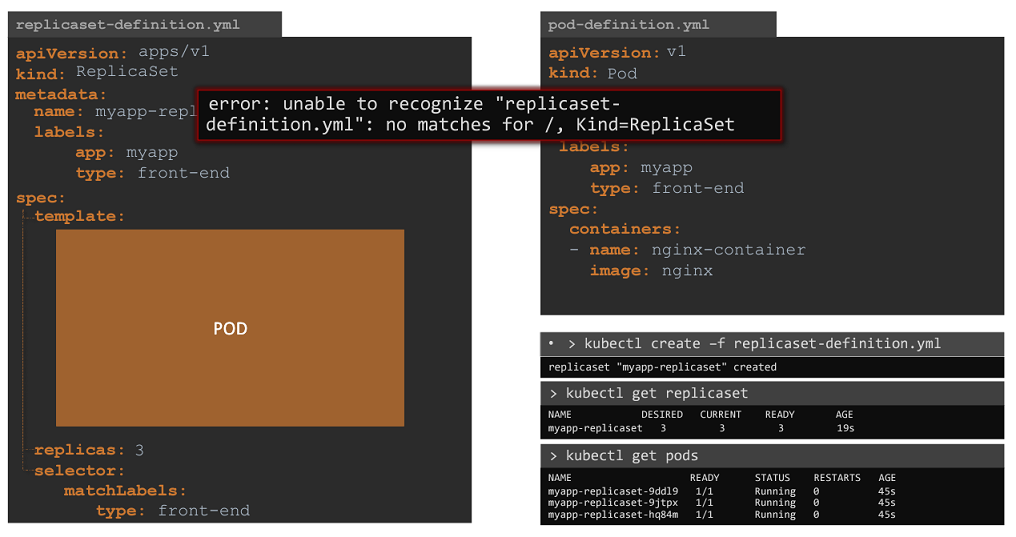

We could now provide these labels as a filter for replica set. Under the selector section, we use the match labels filter and provide the same label that we used while creating the pods.

This way, the replica set knows which pods to monitor.

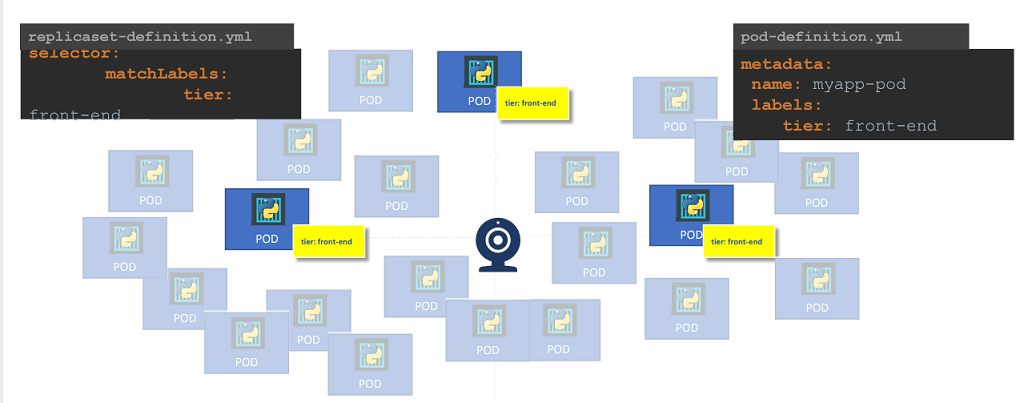

In [ ]:
# update a replica set after increasing the number of replicas
kubectl replace -f replicaset-definition.yml
kubectl scale --replicas==6 -f replicaset-definition.yml

kubectl create -f replicaset-definition.yml
kubectl get replicaset
kubectl delete replicaset myapp-replicaset

### Deployment

So far , we discussed about pods, 
which deploy single instances of our application such as the web application in this case.

Each container is encapsulated in pods.
Multiple such pods are deployed using replication controllers or replica sets.

And then comes deployment, which is a Kubernetes object that comes higher in the hierarchy.

The deployment provides us with the capability to upgrade the underlying instances seamlessly using rolling updates, undue changes, and pause and resume changes as required.

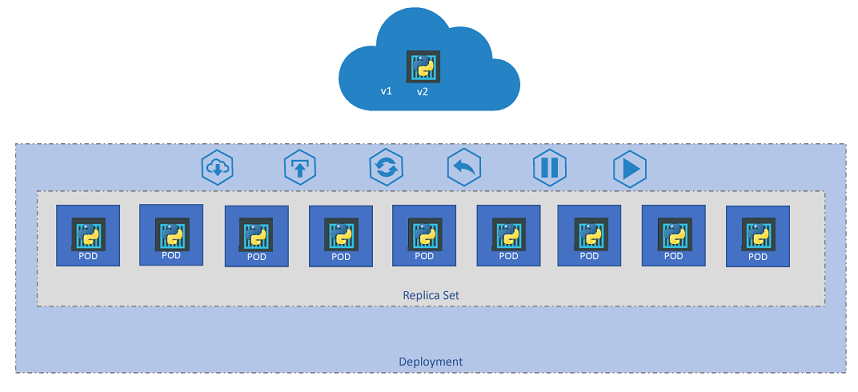

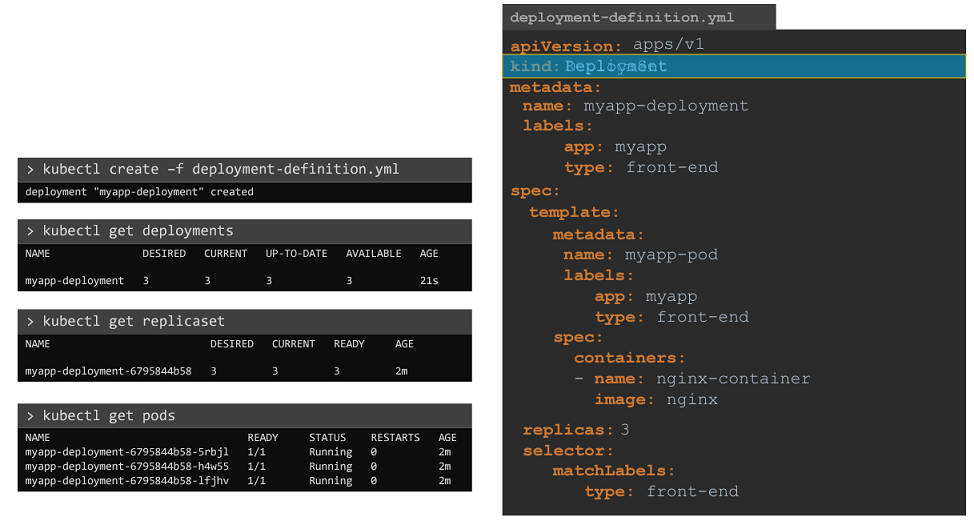

In [ ]:
kubectl get all

The default output format for all kubectl commands is the human-readable plain-text format.

The -o flag allows us to output the details in several different formats.

kubectl [command] [TYPE] [NAME] -o <output_format>

Here are some of the commonly used formats:

1. -o jsonOutput a JSON formatted API object.

2. -o namePrint only the resource name and nothing else.

3. -o wideOutput in the plain-text format with any additional information.

4. -o yamlOutput a YAML formatted API object.

See https://kubernetes.io/docs/reference/kubectl/cheatsheet/

### Namespaces

Whatever we have been doing, we have been doing this within the default namespace, which is created automatically when the cluster is first set up.

Kubernetes creates a set of Pods and Services

For its internal purpose, such as those required by the networking solution, the DNS service, et cetera.

To isolate these from the user and to prevent you from accidentally deleting or modifying these services, Kubernetes creates them under another namespace created at cluster startup named kube-system.

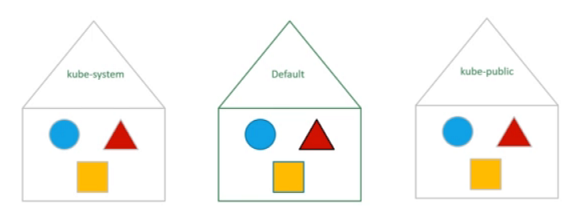

A third namespace created by Kubernetes automatically is called kube-public.

This is where resources that should be made available to all users are created.

You can create your own namespaces as well. 

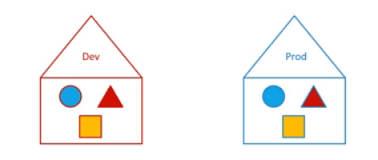

Each of these namespaces can have its own set of policies that define who can do what.

You can also assign quota of resources to each of these namespaces.

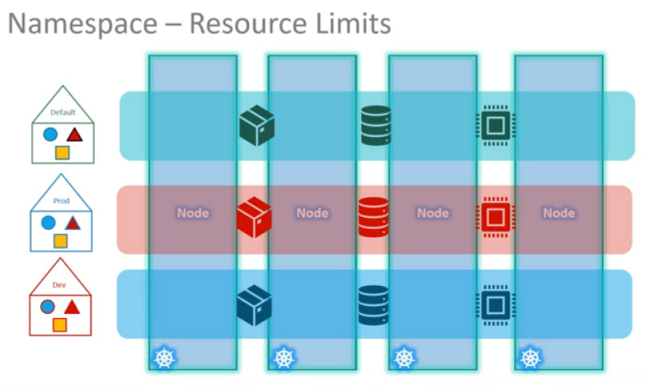

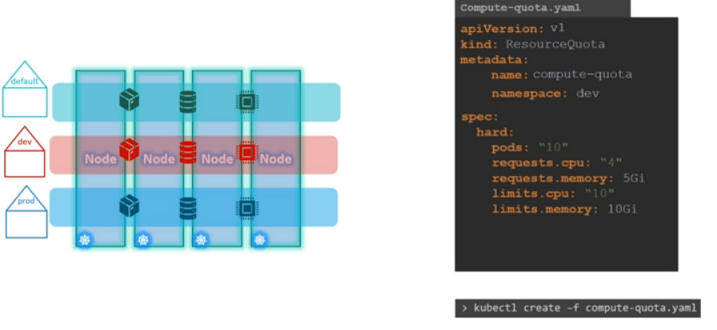

The resources within a namespace can refer to each other simply by their names.

If required, the web app Pod can reach a service in another namespace as well.

For this, you must append the name of the namespace to the name of the service.

For example, for the web Pod in the default namespace to connect to the database in the dev environment or namespace, use the service-name.namespace.svc.cluster.local format.

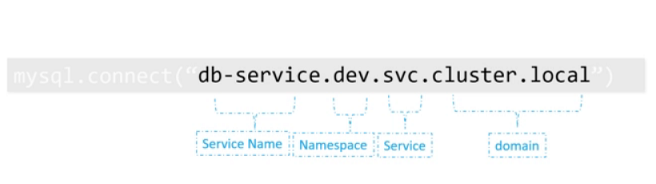

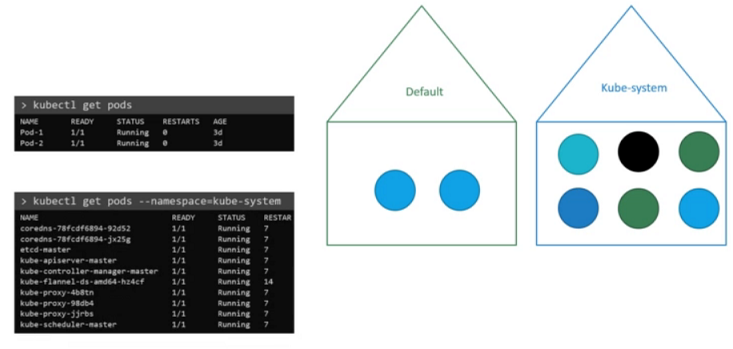

In [ ]:
kubectl create -f pod-definition.yml --namespace=dev

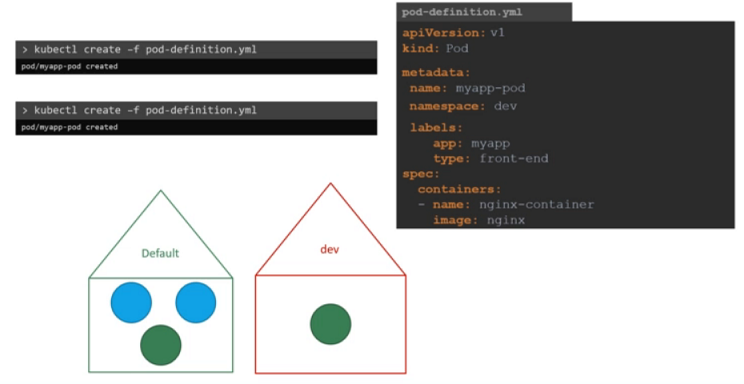

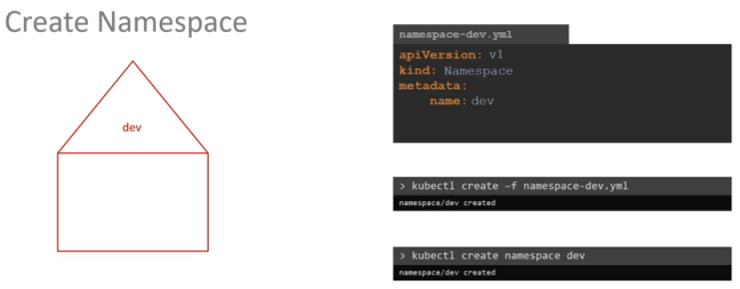

In [ ]:
kubectl get pods --all-namespaces